<h1><center>COSC2753_A1_s3877961</center></h1>
RMIT University Vietnam
<br>
Course: COSC2753 - Machine Learning
<br>
Semester: 2023A
<br>
Author: Le Ngoc Nguyen Thuan (s3877961)

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plat
import seaborn as sns

# Dataset

#### Load datasets

In [86]:
#train dataset
trainDf = pd.read_csv("Paitients_Files_Train.csv", delimiter=',')
#test dataset
testDf = pd.read_csv("Paitients_Files_Test.csv", delimiter=',')
#prediction
predDf = pd.read_csv("S3877961 predictions.csv", delimiter=",")


In [87]:
trainDf.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [88]:
testDf.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


# Remove attribute from datasets
#### Remove 'ID' and 'Insurance'

In [89]:
#remove attribute from train dataset
trainDf.drop(['ID','Insurance'], inplace=True, axis=1)

#remove attribute from test dataset
testDf.drop(['ID','Insurance'], inplace=True, axis=1)

Check dataset after removing attribute

In [90]:
print(trainDf.head(),"\n")
print(trainDf.info(), "\n")
print(trainDf.describe(), "\n")

   PRG   PL  PR  SK   TS   M11    BD2  Age   Sepssis
0    6  148  72  35    0  33.6  0.627   50  Positive
1    1   85  66  29    0  26.6  0.351   31  Negative
2    8  183  64   0    0  23.3  0.672   32  Positive
3    1   89  66  23   94  28.1  0.167   21  Negative
4    0  137  40  35  168  43.1  2.288   33  Positive 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PRG      599 non-null    int64  
 1   PL       599 non-null    int64  
 2   PR       599 non-null    int64  
 3   SK       599 non-null    int64  
 4   TS       599 non-null    int64  
 5   M11      599 non-null    float64
 6   BD2      599 non-null    float64
 7   Age      599 non-null    int64  
 8   Sepssis  599 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 42.2+ KB
None 

              PRG          PL          PR          SK          TS         M11  \
count  

The 'Sepssis' column still contain 'positive' and 'negative'. I have to change it to '1' and '0' in order to normalize the dataset.

In [91]:
print(testDf.head(),"\n")
print(testDf.info(), "\n")
print(testDf.describe(), "\n")

   PRG   PL  PR  SK   TS   M11    BD2  Age
0    1  109  38  18  120  23.1  0.407   26
1    1  108  88  19    0  27.1  0.400   24
2    6   96   0   0    0  23.7  0.190   28
3    1  124  74  36    0  27.8  0.100   30
4    7  150  78  29  126  35.2  0.692   54 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRG     169 non-null    int64  
 1   PL      169 non-null    int64  
 2   PR      169 non-null    int64  
 3   SK      169 non-null    int64  
 4   TS      169 non-null    int64  
 5   M11     169 non-null    float64
 6   BD2     169 non-null    float64
 7   Age     169 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 10.7 KB
None 

              PRG          PL          PR          SK          TS         M11  \
count  169.000000  169.000000  169.000000  169.000000  169.000000  169.000000   
mean     3.917160  123.520710   70.426036   20

##### Replace 'positive' and 'negative' value to '1' and '0'

In [92]:
trainDf[["Sepssis"]] = trainDf[["Sepssis"]].replace("Positive", 1).replace("Negative", 0)
print(trainDf.info())
display(trainDf.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PRG      599 non-null    int64  
 1   PL       599 non-null    int64  
 2   PR       599 non-null    int64  
 3   SK       599 non-null    int64  
 4   TS       599 non-null    int64  
 5   M11      599 non-null    float64
 6   BD2      599 non-null    float64
 7   Age      599 non-null    int64  
 8   Sepssis  599 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 42.2 KB
None


,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepssis
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data distribution

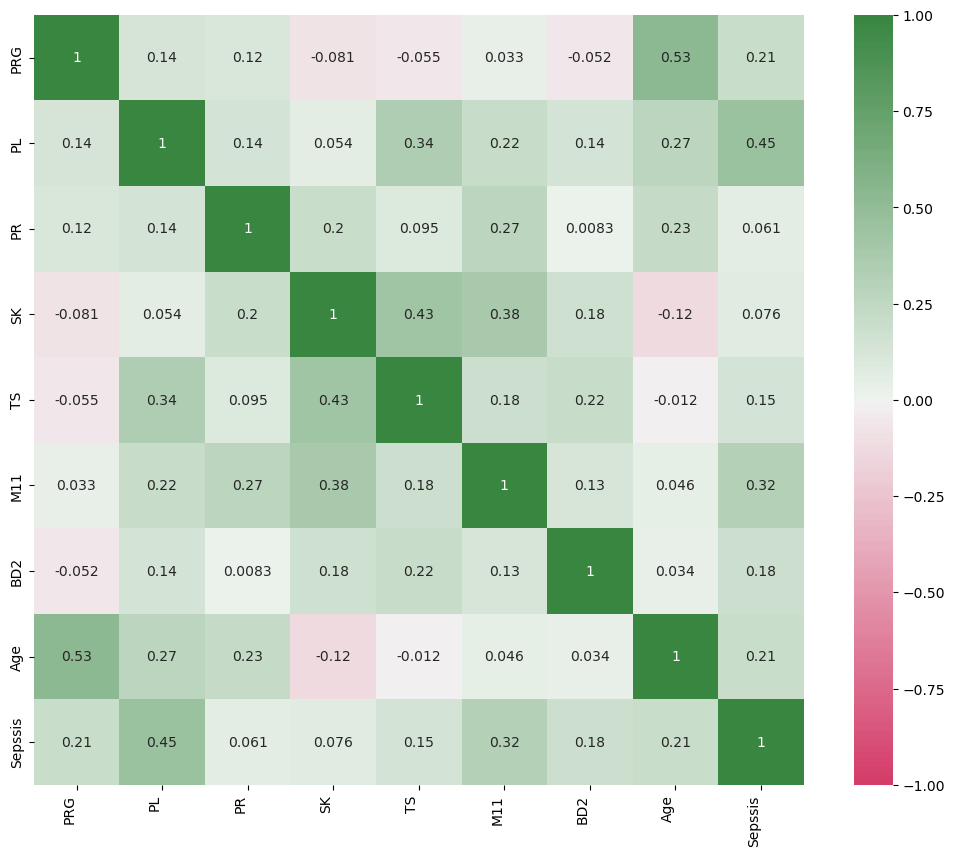

In [93]:
# Create a correlation matrix and use heatmap to identify correlation between variables
#plt.figure(figsize=(8, 8))
#sns.heatmap(trainDf.corr(), annot = True)

# Use heatmap to identify correlation between variables
f, ax = plt.subplots(figsize = (13, 10))
corr = trainDf.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 130, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

comment heatmap

<AxesSubplot:ylabel='Density'>

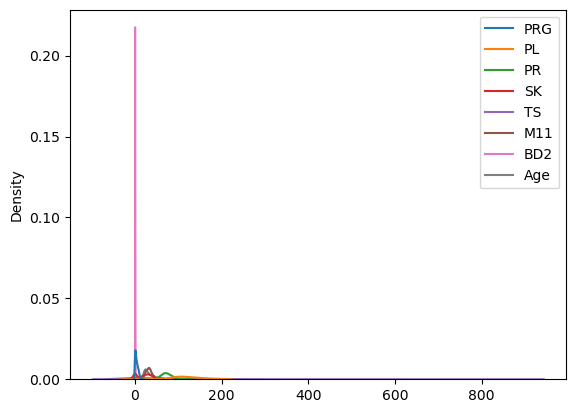

In [94]:
display(sns.kdeplot(data=trainDf.drop(['Sepssis'], axis=1)))

<AxesSubplot:ylabel='Density'>

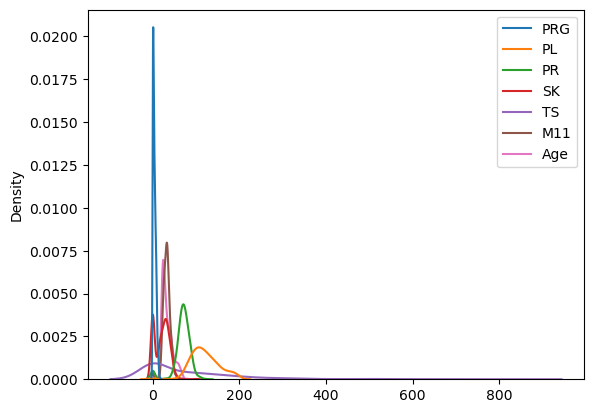

In [95]:
display(sns.kdeplot(data=trainDf.drop(['Sepssis', 'BD2'], axis=1)))

<AxesSubplot:ylabel='Density'>

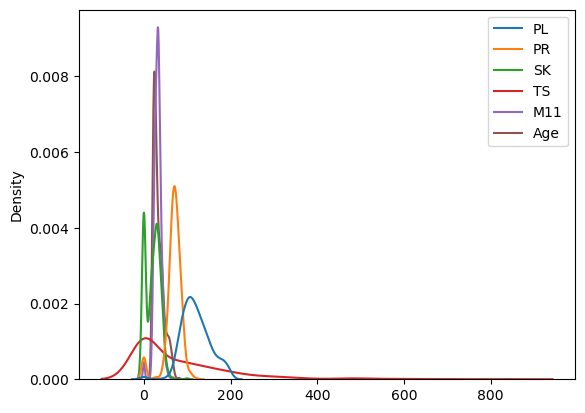

In [96]:
display(sns.kdeplot(data=trainDf.drop(['Sepssis', 'BD2', 'PRG'], axis=1)))

<AxesSubplot:>

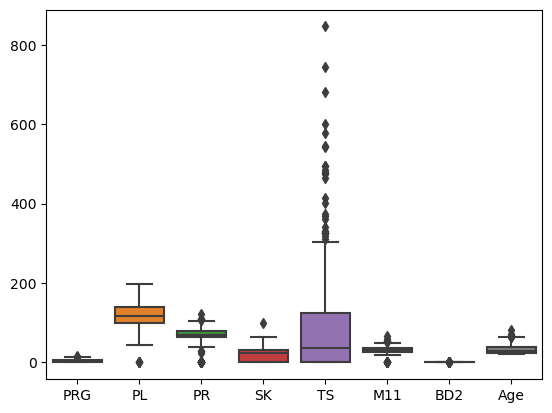

In [97]:
sns.boxplot(data=trainDf.drop(['Sepssis'], axis=1))

The TS attribute has alot of outliers. I have to normalize the data to see if it can reduce the outliers. But first I have to split the data.

# Scaling data

As the boxplot above show that the "TS" attribute have alot of outliers. So I have to normalize the dataset to scale the data down.

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(trainDf)

newtrainDf = scaler.transform(trainDf)

scaledDf = pd.DataFrame(newtrainDf, columns = ["PRG", "PL", "PR", "SK", "TS", "M11", "BD2", "Age", "Sepssis"])
scaledDf.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepssis
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,0.224983,0.606836,0.563384,0.207703,0.093925,0.475708,0.172155,0.204841,0.347245
std,0.197814,0.165062,0.158489,0.161794,0.137797,0.119348,0.144130,0.197141,0.476492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.500000,0.524590,0.000000,0.000000,0.403875,0.072588,0.050000,0.000000
50%,0.176471,0.585859,0.573770,0.232323,0.042553,0.476900,0.130231,0.133333,0.000000
75%,0.352941,0.707071,0.655738,0.323232,0.145981,0.544709,0.242955,0.316667,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

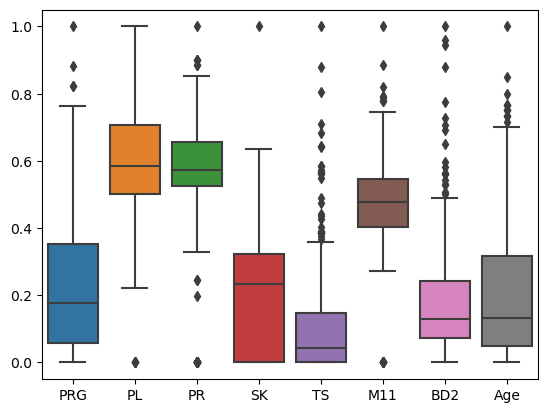

In [99]:
sns.boxplot(data = scaledDf.drop(['Sepssis'], axis=1))

After normalizing the dataset, the "TS" attribute still have a large outliers, so this time,I will try to reduce the outliers mannually.

<AxesSubplot:>

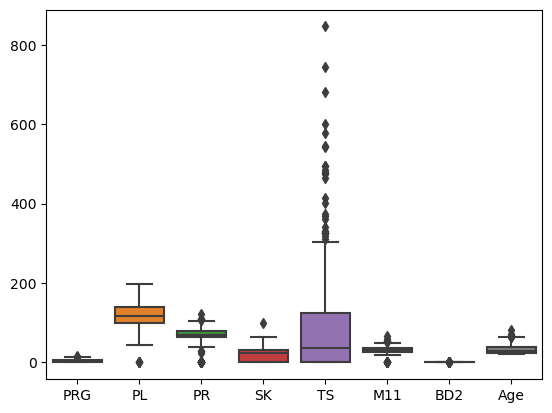

In [100]:
sns.boxplot(data=trainDf.drop(['Sepssis'], axis=1))

There are a lot of ouliers above 300. So, I will delete all the outliers that above 400. I choose 400 instead of 300 because if I delete at 300 it might cause losing data.

In [101]:
# delete rows larger than 400
trainDf.drop(trainDf[trainDf.TS > 400].index, inplace = True)

After detele all outliers above 400, I will normalize the data again.

In [102]:
scaler = MinMaxScaler()
scaler.fit(trainDf)

newtrainDf = scaler.transform(trainDf)

scaledDf = pd.DataFrame(newtrainDf, columns = ["PRG", "PL", "PR", "SK", "TS", "M11", "BD2", "Age", "Sepssis"])
scaledDf.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepssis
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,0.225608,0.600923,0.562649,0.203718,0.177798,0.474127,0.169123,0.204260,0.341338
std,0.198212,0.162185,0.160077,0.161374,0.230266,0.119518,0.138476,0.196009,0.474566
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.492424,0.524590,0.000000,0.000000,0.401639,0.071734,0.050000,0.000000
50%,0.176471,0.580808,0.573770,0.222222,0.048000,0.476900,0.128096,0.133333,0.000000
75%,0.352941,0.702020,0.655738,0.323232,0.306667,0.543219,0.241033,0.316667,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

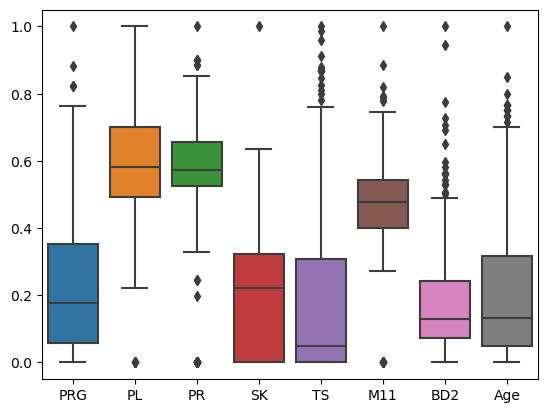

In [103]:
sns.boxplot(data = scaledDf.drop(['Sepssis'], axis=1))

It look much better compare to only using MinMaxScaler. Now I will process to the next step

# Data preprocessing

Create train X and Y to use with models

In [111]:
X = scaledDf.drop(['Sepssis'], axis = 1)
Y = scaledDf[['Sepssis']]

In [112]:
print(X.shape)
print(Y.shape)

(583, 8)
(583, 1)


### Checking data balance for logistic regression

In [115]:
!pip install plotnine #install plotnine package mannually

In [126]:
from plotnine import *
from plotnine.data import mtcars

%matplotlib inline

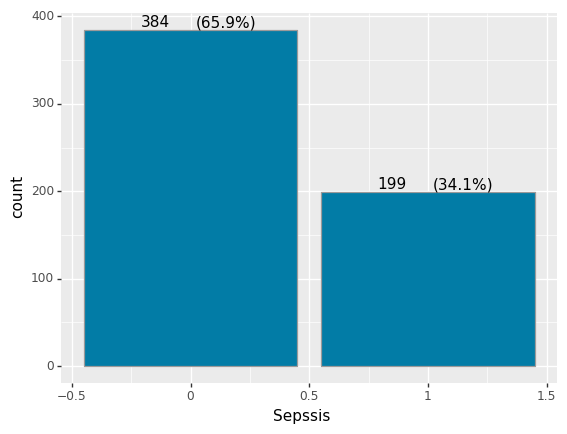

<ggplot: (146244267993)>

In [159]:
#Display
(ggplot(Y, aes('Sepssis', fill='Sepssis'))
 + geom_bar(color='#9c9a9a', fill='#027ca6')
 + geom_text(
     aes(label=after_stat('count')),
     stat='count',
     nudge_x=-0.15,
     nudge_y=0.15,
     va='bottom'
 )
 + geom_text(
     aes(label=after_stat('prop*100'), group=1),
     stat='count',
     nudge_x=0.15,
     nudge_y=0.15,
     va='bottom',
     format_string='({:.1f}%)'
 )
)

The ratio of 0 and 1 value is 66-34. Which not far from the ideal ration 50-50. However, I will try to improve this as close as possible to the ideal ratio. I will use the method Random Undersampling to reduce the value "0". There is also another method called Random Oversampling, Unlike undersampling, oversampling doesn’t involve throwing away data, so it can help balancing data without the risk of losing important information. However, because  this technique will generate artificial data which might lead to overfiting and affect training model.

In [118]:
# Apply Random Oversampling

# For certain devices, you might need to manually install the imblearn module in order to use.
!pip install imblearn 
# Install imblearn module

     ------------------------------------ 226.0/226.0 kB 492.6 kB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 301.9 kB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [121]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(sampling_strategy = "not minority")
X_res, Y_res = ros.fit_resample(X, Y)

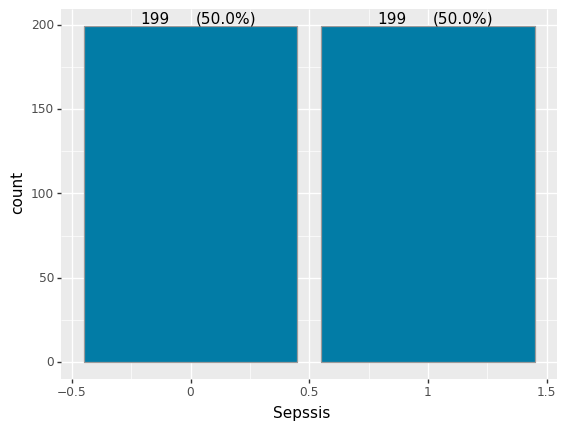

<ggplot: (146244227057)>

In [158]:
#Display
(ggplot(Y_res, aes('Sepssis', fill='Sepssis'))
 + geom_bar(color='#9c9a9a', fill='#027ca6')
 + geom_text(
     aes(label=after_stat('count')),
     stat='count',
     nudge_x=-0.15,
     nudge_y=0.15,
     va='bottom'
 )
 + geom_text(
     aes(label=after_stat('prop*100'), group=1),
     stat='count',
     nudge_x=0.15,
     nudge_y=0.15,
     va='bottom',
     format_string='({:.1f}%)'
 )
)

The data is now balance. Let's move on to spliting data for training.

## Spliting dataset

In [160]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(np.array(X), np.array(Y), test_size = 0.2, shuffle=True)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(466, 8)
(117, 8)
(466, 1)
(117, 1)


In [161]:
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size = 0.25, shuffle = True)

In [162]:
print(trainX.shape)
print(valX.shape)
print(trainY.shape)
print(valY.shape)

(349, 8)
(117, 8)
(349, 1)
(117, 1)


# Training the model